# Montée en puissance v2

On s'appuie sur les expériences précédentes pour faire mieux, faire des fonctions propres et nettoyer les essais amont au fur et à mesure.

On travaille par lots et échantillons réduits en s'assurant préalablement des temps d'exécution.

On enregistre les résultats dans des fichiers.

On sort de la logique séquentielle du notebook avec une approche à cellules les plus indépendantes possible les unes des autres.

## Utilitaires

### Data loading

In [ ]:
from seattle_commons import get_clean_ml_data
ml_data = get_clean_ml_data()

### Dataset

<mark>TODO : mettre en oeuvre la stratification</mark>

Nous nous dotons d'une structure pour regrouper les paramètres de partition et les parties du jeu de donnée en vue de la modélisation (sépération des jeux d'entrainement et de test, normalisation, etc).

Cette structure se charge elle-même de la séparation des jeux d'entraînement et de test, ainsi que de la normalisation.

Les champs de la classe sont les suivants :
* `data` le jeu de données original.
* `name` le nom attribué à ce jeu de donnée.
* `random_state` la graine utilisée pour la sélection des jeux d'entraînement et de test.
* `test_size` l'effectif relatif du jeu de test.
* `features` les caractéristiques du jeu de données.
* `targets` les cibles du jeu de données.
* `X_train`, `X_test`, `Y_train`, `Y_test`
* `_X_train`, `_Y_test`
* `X` `(X_train, X_test)`
* `_X` `(_X_train, _X_test)`
* `Y` `(Y_train, Y_test)`
* `XY` `(X_train, X_test, Y_train, Y_test)`
* `_XY` `(_X_train, _X_test, Y_train, Y_test)`

Cette classe pourra être ultérieurement améliorée pour dériver de la classe [`sklearn.utils.Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) et sa structure interne des bouquets retournés par les fonctions de l'API [`sklearn.datasets`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) documentée dans la section [7. Utiliaires de chargement de jeux de données](https://scikit-learn.org/stable/datasets.html) du guide utilisateur.

In [ ]:
from pepper_skl_commons import get_X_Y, scale_X, Dataset

# Tests de Dataset
random_state = 0
test_size = .3
ds = Dataset(ml_data, 'all', random_state, test_size)
print(ds)
display(ds._X)

### Partition

In [ ]:
from pepper_selection import multipartition
from seattle_commons import rnr_mapper

# test de partition
from pepper_commons import print_subtitle
map = {'BuildingType': rnr_mapper, 'PrimaryPropertyType': rnr_mapper}
parts, cats = multipartition(data, map)
for p, c in zip(parts, cats):
    print_subtitle(str(c))
    display(p)


('Residential', 'Residential')


,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
13,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,98104.0,0939000105,7,DOWNTOWN,47.60284,-122.33184,...,187.399994,4.573777e+06,4.807680e+06,1039735.188,7.420912e+05,2532015.0,10020.259770,1002026.0,151.12,2.37
265,Multifamily MR (5-9),Mid-Rise Multifamily,YWCA Opportunity Place,2024 3rd Avenue,98121.0,8729690000,7,DOWNTOWN,47.61316,-122.34153,...,178.800003,1.004012e+07,1.044268e+07,0.000,1.612728e+06,5502627.0,45374.941410,4537494.0,279.35,2.39
280,Multifamily MR (5-9),Mid-Rise Multifamily,Wintonia,1431 Minor Ave,98101.0,8725600350,7,EAST,47.61360,-122.32785,...,162.899994,4.189569e+06,4.480534e+06,0.000,4.903724e+05,1673151.0,25164.187500,2516419.0,145.31,2.80
296,Multifamily LR (1-4),Low-Rise Multifamily,Cooper School Artist's Lofts,4408 Delridge Way SW,98106.0,3388120000,1,DELRIDGE,47.56379,-122.36301,...,88.400002,1.986611e+06,2.185550e+06,0.000,3.493257e+05,1191899.0,7947.119629,794712.0,50.52,0.89
297,Multifamily MR (5-9),Mid-Rise Multifamily,LAKE CITY COURT,12730 33RD AVE NE,98125.0,3993000000,5,NORTH,47.72232,-122.29181,...,138.500000,2.473962e+06,2.574628e+06,0.000,4.558248e+05,1555274.0,9186.879883,918688.0,59.63,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50089,Multifamily LR (1-4),Low-Rise Multifamily,Atrium Apartments,3104 South Day Street,98144.0,3628800000,3,CENTRAL,47.59052,-122.29208,...,121.199997,2.181834e+06,2.181834e+06,0.000,2.556968e+05,872437.0,13093.959960,1309396.0,75.62,2.97
50090,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,...,85.400002,2.337651e+06,2.493278e+06,0.000,4.407752e+05,1503925.0,8337.259766,833726.0,54.76,0.86
50093,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,98104.0,9822000080,3,EAST,47.60189,-122.32182,...,85.099998,2.161240e+06,2.161240e+06,0.000,6.334232e+05,2161240.0,0.000000,0.0,15.07,0.18



('NonResidential', 'NonResidential')


,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,...,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99



('Residential', 'NonResidential')


,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
19451,Multifamily LR (1-4),Senior Care Community,Paramount Rehab & Nursing,2611 S Dearborn St.,98144.0,0424049024,3,CENTRAL,47.595050,-122.298240,...,121.900002,9.097980e+06,9.405139e+06,0.0,8.861921e+05,3023688.0,60742.917970,6074292.0,343.68,5.18
19498,Multifamily LR (1-4),Mixed Use Property,Yesler Place,1404 E Yesler Way,98144.0,0007600129,3,CENTRAL,47.601900,-122.313790,...,80.099998,5.603345e+05,5.830684e+05,0.0,1.642246e+05,560334.0,0.000000,0.0,3.91,0.10
19510,Multifamily LR (1-4),Mixed Use Property,The Admiral West Seattle-415,2331 42nd Ave SW,98116.0,0054000000,1,SOUTHWEST,47.582200,-122.385420,...,97.500000,2.255460e+06,2.354759e+06,0.0,5.138009e+05,1753089.0,5023.709961,502371.0,38.90,0.42
20093,Multifamily HR (10+),Other,The Olivian,809 Olive Way,98101.0,0660000835,7,DOWNTOWN,47.613970,-122.333510,...,133.300003,1.559074e+07,1.622452e+07,0.0,3.145485e+06,10732395.0,48583.468750,4858347.0,332.85,0.66
20445,Multifamily MR (5-9),Mixed Use Property,24757-Brookdale West Seattle,4611 35th Ave SW,98126.0,0952008285,1,SOUTHWEST,47.561620,-122.376550,...,126.199997,4.358944e+06,4.572806e+06,0.0,1.004876e+06,3428637.0,9303.070313,930307.0,73.31,0.69
20564,Multifamily LR (1-4),Mixed Use Property,Sweetbrier Apartments,8 West Crockett,98109.0,1794500785,7,MAGNOLIA / QUEEN ANNE,47.637340,-122.357240,...,96.699997,1.618536e+06,1.618536e+06,0.0,4.743657e+05,1618536.0,0.000000,0.0,11.28,0.13
20570,Multifamily LR (1-4),Mixed Use Property,Eden Hill (McKinstry),11 West Crockett,98119.0,1794501111,7,MAGNOLIA / QUEEN ANNE,47.636780,-122.357340,...,138.199997,2.531163e+06,2.546467e+06,0.0,6.176421e+05,2107395.0,4237.679688,423768.0,37.20,0.45
20758,Multifamily LR (1-4),Small- and Mid-Sized Office,Queenview Apartments,621 W Galer St,98119.0,1732801350,7,MAGNOLIA / QUEEN ANNE,47.632170,-122.365320,...,30.900000,6.231077e+05,6.385112e+05,0.0,2.953850e+04,100785.0,5223.221680,522322.0,28.44,1.00
20899,Multifamily LR (1-4),Mixed Use Property,Cosmopolitan Apartments,400 NE 45th St # 120,98105.0,1890000005,4,LAKE UNION,47.661600,-122.323670,...,116.000000,4.141786e+06,4.500902e+06,0.0,7.619370e+05,2599729.0,15420.559570,1542056.0,100.02,0.79



('NonResidential', 'Residential')


,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
19445,NonResidential,Low-Rise Multifamily,Pacific Pointe,2108 N Pacific St.,98103.0,0354000254,4,LAKE UNION,47.64859,-122.33311,...,65.099998,1997181.5,2090011.625,0.0,5.111956e+05,1744199.0,2529.819824,252982.0,25.60,0.28
21481,Campus,Low-Rise Multifamily,Sanitary Market,1525 FIrst Avenue,98101.0,1976200210,7,DOWNTOWN,47.60918,-122.34079,...,267.500000,3778355.0,3778355.000,0.0,1.107372e+06,3778355.0,0.000000,0.0,26.34,0.58


In [ ]:
from seattle_commons import get_rnr_datasets

# test get_rnr_datasets
random_state = 42
test_size = .3
for ds in get_rnr_datasets(data, 'all', random_state, test_size):
    display(str(ds))

"all[('Residential', 'Residential')] | seed: 42 | train-test: 70-30\nfeatures: ['bid', 'pid', 'x', 'y', 'z', 't', 'asc', 's_e', 's_i', 's_u_0', 's_u_1', 's_u_2', 's_u_3', 's_u_4', 's_u_5', 's_u_6', 's_u_7', 's_u_8', 's_u_9', 's_u_10', 's_u_11', 's_u_12', 's_u_13', 's_u_14', 's_u_15', 's_u_16', 's_u_17', 's_u_18', 's_u_19', 's_u_20', 's_u_21', 's_u_22', 's_u_23', 's_u_24', 's_u_25', 's_u_26', 's_u_27', 's_u_28', 's_u_29', 's_u_30', 's_u_31', 's_u_32', 's_u_33', 's_u_34', 's_u_35', 's_u_36', 's_u_37']\ntargets: ['ies_wn', 'ies', 'ie_wn', 'ie', 'ie_e', 'ie_s', 'ie_g', '1000 ih']\n"

"all[('NonResidential', 'NonResidential')] | seed: 42 | train-test: 70-30\nfeatures: ['bid', 'pid', 'x', 'y', 'z', 't', 'asc', 's_e', 's_i', 's_u_0', 's_u_1', 's_u_2', 's_u_3', 's_u_4', 's_u_5', 's_u_6', 's_u_7', 's_u_8', 's_u_9', 's_u_10', 's_u_11', 's_u_12', 's_u_13', 's_u_14', 's_u_15', 's_u_16', 's_u_17', 's_u_18', 's_u_19', 's_u_20', 's_u_21', 's_u_22', 's_u_23', 's_u_24', 's_u_25', 's_u_26', 's_u_27', 's_u_28', 's_u_29', 's_u_30', 's_u_31', 's_u_32', 's_u_33', 's_u_34', 's_u_35', 's_u_36', 's_u_37', 's_u_38', 's_u_39', 's_u_40', 's_u_41', 's_u_42', 's_u_43', 's_u_44', 's_u_45', 's_u_46', 's_u_47', 's_u_48', 's_u_49', 's_u_50', 's_u_51', 's_u_52', 's_u_53', 's_u_54', 's_u_55', 's_u_56', 's_u_57', 's_u_58', 's_u_59', 's_u_60', 's_u_61', 's_u_62', 's_u_63', 's_u_64', 's_u_65', 's_u_66']\ntargets: ['ies_wn', 'ies', 'ie_wn', 'ie', 'ie_e', 'ie_s', 'ie_g', '1000 ih']\n"

"all[('Residential', 'NonResidential')] | seed: 42 | train-test: 70-30\nfeatures: ['bid', 'pid', 'x', 'y', 'z', 't', 'asc', 's_e', 's_i', 's_u_0', 's_u_1', 's_u_2', 's_u_3', 's_u_4', 's_u_5', 's_u_6', 's_u_7', 's_u_8', 's_u_9', 's_u_10', 's_u_11', 's_u_12', 's_u_13', 's_u_14', 's_u_15', 's_u_16']\ntargets: ['ies_wn', 'ies', 'ie_wn', 'ie', 'ie_e', 'ie_s', 'ie_g', '1000 ih']\n"

### Recherche des meilleurs paramètres

In [ ]:
from pepper_skl_commons import get_best_params

### Scores

In [ ]:
# from pepper_skl_commons import empty_scores

import pandas as pd
def empty_scores():
    return pd.DataFrame(
        columns=[
            'date', 'dataset', 'target', 'method', 'params', 'dummy',
            'train_eval_time', 'train_score', 'test_score', 'dummy_r2']
    )

from pepper_skl_commons import append_score

### Fonction principale générique

In [ ]:
from pepper_skl_commons import ml_main_6_scored

## LinearRegression

Régresseur linéaire classique

`linear_model.LinearRegression(*[, ...])`

Régression linéaire ordinaire par les moindres carrés

### Première exploration

Extension :
* ensemble : résidentiel vs non-résidentiel pour (btype, btype) -> 3 classes
* cibles : les 8
* `random_state = 0, .., 99` (100)
* `test_size = .3 à .6` (10)

Cela fait donc 24 000 configurations à tester.

Temps d'entraînement et d'évaluation par configuration (TODO : moyenne et écart type)
* de 0,04 à 0,32 secondes
* temps total de 4132 s sur Belladonna (TODO : config) soit 0,17 secondes en moyenne par configuration testée

Si la performance croit tendanciellement avec la taille relative du jeu d'entraînement (paramètre `test_size`), elle varie significativement suivant le `random_state`, qui sent le surapprentissage à plein nez.

Cela pose un sérieux problème pour lequel nous n'avons à ce stade aucune explication.

Questionnement d'Internet :
* https://datascience.stackexchange.com/questions/110836/random-state-on-train-test-split-appears-to-have-large-effect-in-performance-m

In [ ]:
import numpy as np

model = linear_model.LinearRegression
param_grid = {}

print_title(str(model))
print(bold('param_grid'), ':', param_grid)

random_states = np.arange(100)
test_sizes = np.linspace(.3, .6, 10)

verbose = False
all_scores = []
total_time = 0
for random_state in random_states:
    for test_size in test_sizes:
        datasets = get_rnr_datasets(data, name='all', random_state=random_state, test_size=test_size)
        for dataset in datasets:
            if verbose:
                print_title(f'dataset {dataset.name}, random_state {random_state}, test_size {round(100 * test_size)} %')
            t = time.time()
            scores = ml_main_6_scored(dataset, model, param_grid, verbose=False)
            t = time.time() - t
            if verbose:
                print(bold('total time'), ':', round(t, 2), 's')
            else:
                print('.', end='')
            total_time += t
            all_scores += [scores]
    if not verbose:
        print()

print(bold('TOTAL TIME'), ':', round(total_time, 2), 's')
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)

#### Analyse et sauvegarde des scores

In [ ]:
# A revoir : simplement :
# 0. ✔ réintroduire la variation des random_states, ajouter celle des test_size (à ajouter dans le tableau) + temps
# 1. ✔ scinder par classe => inutile de les agréger plus haut
# 2. ✔ ordonner par cible, et par performances décroissantes
# 3. ✔ extraire de ce tableau le sous-tableau des 3 meilleures perfs
# 4. modifier le str de Dataset :  a) ajout __json__ b) __str__ = json.dumps 
# 5. ✔ enregistrer les deux tableaux en CSV daté
# 6. ✔ ajouter all pour comparer les performance de all avec celles de chacune des classes
#        RESTE + ajouter la config json du dataset
#        RESTE en option, permettre l'expansion du json en plusieurs colonnes
# 7. ✔ faire quelques graphiques pour visualisation (idéalement une nappe 3D)
# 8. étudier la durée d'exécution pour pouvoir l'anticiper
# 9. relancer avec les 3 niveaux de détails btype x ptype

map = {'dataset': None, 'target': None}
all_scores.to_csv('all_scores_2022_10_23_19_30.csv')
all_scores_by_class_target, classes = multipartition(all_scores, map)
best_scores_by_class_target = []
for p, c in zip(all_scores_by_class_target, classes):
    # print_subtitle(str(c))
    p = p.sort_values(by=['target', 'test_score'], ascending=[True, False])
    best_scores_by_class_target += [p.nlargest(n=3, columns='test_score', keep='all')]
    # display(p)
best_scores_by_class_target = pd.concat(best_scores_by_class_target, axis=0)
display(best_scores_by_class_target)
all_scores.to_csv('best_scores_2022_10_23_19_30.csv')

,date,dataset,target,method,params,dummy,train_eval_time,train_score,test_score,dummy_r2
15615,2022-10-23 18:33:20.630404,"all[('NonResidential', 'NonResidential')]",1000 ih,LinearRegression,"{'random_state': 65, 'test_size': 0.3}",dummy,0.103,0.493,0.436,_dummy_score
8415,2022-10-23 18:14:30.319448,"all[('NonResidential', 'NonResidential')]",1000 ih,LinearRegression,"{'random_state': 35, 'test_size': 0.3}",dummy,0.107,0.500,0.393,_dummy_score
1023,2022-10-23 17:52:23.887827,"all[('NonResidential', 'NonResidential')]",1000 ih,LinearRegression,"{'random_state': 4, 'test_size': 0.367}",dummy,0.127,0.504,0.382,_dummy_score
15611,2022-10-23 18:33:20.219404,"all[('NonResidential', 'NonResidential')]",ie,LinearRegression,"{'random_state': 65, 'test_size': 0.3}",dummy,0.096,0.542,0.577,_dummy_score
18035,2022-10-23 18:40:07.686983,"all[('NonResidential', 'NonResidential')]",ie,LinearRegression,"{'random_state': 75, 'test_size': 0.333}",dummy,0.131,0.524,0.546,_dummy_score
...,...,...,...,...,...,...,...,...,...,...
4092,2022-10-23 18:01:36.339067,"all[('NonResidential', 'NonResidential')]",ie_e,LinearRegression,"{'random_state': 17, 'test_size': 0.3}",dummy,0.122,0.551,0.649,_dummy_score
19452,2022-10-23 18:43:47.041883,"all[('NonResidential', 'NonResidential')]",ie_e,LinearRegression,"{'random_state': 81, 'test_size': 0.3}",dummy,0.121,0.507,0.647,_dummy_score
7944,2022-10-23 18:13:17.433393,"all[('Residential', 'Residential')]",ies_wn,LinearRegression,"{'random_state': 33, 'test_size': 0.333}",dummy,0.138,0.163,0.180,_dummy_score
7920,2022-10-23 18:13:13.786392,"all[('Residential', 'Residential')]",ies_wn,LinearRegression,"{'random_state': 33, 'test_size': 0.3}",dummy,0.091,0.164,0.163,_dummy_score


#### Représentation grahique 3D des scores

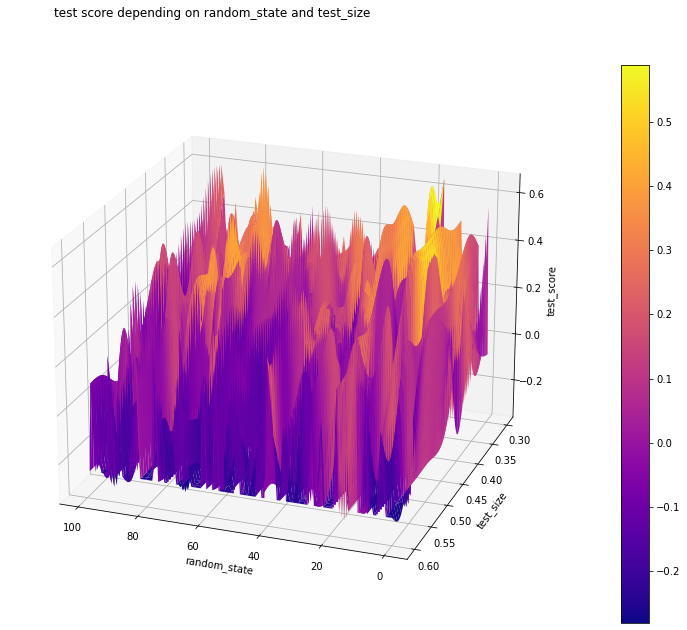

In [ ]:
# Affichage 3D :
# random_state (x) x test_size (y) x test_score (z)
# pour chacune des classes

# on commence par la première classe
"""p, c = all_scores_by_class_target[0], classes[0]
p = p.sort_values(by=['target', 'test_score'], ascending=[True, False])
print_subtitle(str(c))
display(p)"""

nr_scores = all_scores[all_scores.dataset == "all[('NonResidential', 'NonResidential')]"]
#display(nr_scores)

def expand_dicts(s):
    res = pd.concat([s.apply(lambda x: x['random_state']), s.apply(lambda x: x['test_size'])], axis=1)
    res.columns = ['random_state', 'test_size']
    return res

def unpack_item(s, key):
    return s.apply(lambda x: x[key]).values

x = unpack_item(nr_scores.params, 'random_state')
y = unpack_item(nr_scores.params, 'test_size')

# on réduit les scores à l'intervalle -1, 1 : les résultat contreperformants < -.25 sont ramenés à -.25
test_scores = nr_scores.test_score.copy()
test_scores[test_scores < -.25] = -.25
z = test_scores.values

# voir https://stackoverflow.com/questions/21161884/plotting-a-3d-surface-from-a-list-of-tuples-in-matplotlib
#from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.plasma)

ax.set_xlabel('random_state')
ax.set_ylabel('test_size')
ax.set_zlabel('test_score')

# pretty init view
ax.view_init(elev=22, azim=110)
plt.colorbar(surf)
plt.suptitle('test score depending on random_state and test_size')
plt.subplots_adjust(top=0.9)

plt.show()


### Seconde exploration

3 tt x 10 rs x 50 cl = 1500 configurations ⇒ devrait prendre environ 5 minutes

Me suis planté : oublié  x 8 targets et laissé 43 rs, d'où 51600 configs testées en 57 minutes.

* ✔ diminuer le nombre de test_sizes -> .3, .25, .2
* ✔ descendre à cv=5, random_state in [40, 49]
* étudier la durée d'exécution pour pouvoir l'anticiper : 2 voies à envisager
    * **théorique**, cf. les dimensions et la connaissance de la complexité temporelle et spatiale de l'algo (souhaitable pour ma formation)
    * **pratique**, en mesurant sa moyenne sur un sous-ensemble avant de lancer l'exécution sur l'ensemble complet :
        * ✔ je commence en pratique draft, i.e. en lançant et en stoppant l'exécution
* ajouter un score de prédiction sur le reste (le score de test devient une validation interne à la classe et ce test de prédiction permet de mesurer la capacité de généralisation)
* ✔ relancer avec les 3 niveaux de détails btype x ptype + avec all (pour comparer)

In [ ]:
from seattle_commons import get_right_rnr_datasets, get_left_rnr_datasets, get_fine_grained_datasets
from seattle_commons import get_all_parts_datasets

datasets = get_all_parts_datasets(data, 'truc', 0, .3)
print(len(datasets))

50


In [ ]:
import numpy as np
from sklearn import linear_model
from pepper_commons import print_title, bold
import time
from pepper_skl_commons import get_baseline_err

model = linear_model.LinearRegression
param_grid = {}

print_title(str(model))
print(bold('param_grid'), ':', param_grid)

random_states = np.arange(43)
test_sizes = [.3, .25, .2]

verbose = True
all_scores = []
total_time = 0
for random_state in random_states:
    for test_size in test_sizes:
        if verbose:
            print_subtitle(f'random_state {random_state}, test_size {round(100 * test_size)} %')
        datasets = get_all_parts_datasets(data, name='all', random_state=random_state, test_size=test_size)
        for dataset in datasets:
            if verbose:
                print(f'dataset {dataset.name}, size {dataset.data.shape[0]}, '
                    f'random_state {random_state}, test_size {round(100 * test_size)} % ⇒ ', end='')
            t = time.time()
            scores = ml_main_6_scored(dataset, model, param_grid, cv=5, verbose=False)
            t = time.time() - t
            if verbose:
                print(bold('time'), ':', round(t, 2), 's')
            else:
                print('.', end='')
            total_time += t
            all_scores += [scores]
        if not verbose:
            print()

print(bold('TOTAL TIME'), ':', round(total_time, 2), 's')
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)

In [ ]:
map = {'dataset': None, 'target': None}
all_scores.to_csv('all_scores_2022_10_24_17_30.csv')
all_scores_by_class_target, classes = multipartition(all_scores, map)
best_scores_by_class_target = []
for p, c in zip(all_scores_by_class_target, classes):
    # print_subtitle(str(c))
    p = p.sort_values(by=['target', 'test_score'], ascending=[True, False])
    best_scores_by_class_target += [p.nlargest(n=3, columns='test_score', keep='all')]
    # display(p)
best_scores_by_class_target = pd.concat(best_scores_by_class_target, axis=0)
display(best_scores_by_class_target)
all_scores.to_csv('best_scores_2022_10_24_17_30.csv')

Les résultats : la division par classes n'améliore pas les performances.

TODO NEXT
1. La performance reste significativement dépendante du random_state, ce qui laisse entendre qu'il y a quelque chose à faire au niveau de la sélection, certainement la méthode de stratification qui devrait dépendre des deux classes..
2. Remonter les nouvelles fonctions dans les .py et mettre à jour (nettoyer le fichier (et aussi infer -> déplacer dans formation))
3. passer à Ridge, Lasso, etc

In [ ]:
from pepper_skl_commons import surf3d_rs_ts_tsc

for p, c in zip(all_scores_by_class_target, classes):
    print_subtitle(str(c))
    surf3d_rs_ts_tsc(p, c)


## [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge)

[User Guide | 1.1.2. Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

### Chargement des données

In [ ]:
from seattle_commons import get_clean_ml_data
ml_data = get_clean_ml_data()

### Passe de dégrossissage

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from pepper_commons import print_title, print_subtitle, bold
import time
from pepper_skl_commons import Dataset, get_baseline_err, ml_main_6_scored
from seattle_commons import get_all_parts_datasets

model = linear_model.Ridge
param_grid = {
    'alpha': np.logspace(-3, 3, 100),
    'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga', 'cholesky', 'lsqr'], # 'lbfgs': only if positive=True
    'random_state': [42]
}

"""
Seconde passe après analyse des résultats
logspace entre 10-1 et 10+2
solver : pas cholesky, ni lsqr
correctif, car le random_state de l'algo écrase celui du test_train_split
"""

print_title(str(model))
print(bold('param_grid'), ':')
display(param_grid)

random_states = [40, 41, 42, 43]
test_sizes = [.25]

verbose = True
all_scores = []
total_time = 0
for random_state in random_states:
    for test_size in test_sizes:
        if verbose:
            print_subtitle(f'random_state {random_state}, test_size {round(100 * test_size)} %')
        # datasets = get_all_parts_datasets(data, name='all', random_state=random_state, test_size=test_size)
        dataset = Dataset(ml_data, 'all', random_state, test_size)
        if verbose:
            print(f'dataset {dataset.name}, size {dataset.data.shape[0]}, '
                f'random_state {random_state}, test_size {round(100 * test_size)} % ⇒ ', end='')
        t = time.time()
        scores = ml_main_6_scored(dataset, model, param_grid, cv=5, verbose=True)
        t = time.time() - t
        if verbose:
            print(bold('time'), ':', round(t, 2), 's')
        else:
            print('.', end='')
        total_time += t
        all_scores += [scores]

print(bold('TOTAL TIME'), ':', round(total_time, 2), 's')
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)

### Analyse et enregistrement des résultats

In [ ]:
# virer à la prochaine passe
display(all_scores)
all_scores.to_csv('ridge_scores_2022_10_27_09_00.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from pepper_commons import print_title, print_subtitle, bold
import time
from pepper_skl_commons import Dataset, get_baseline_err, search_best_params
from seattle_commons import get_all_parts_datasets

model = linear_model.Ridge

"""
Seconde passe après analyse des résultats
logspace entre 10-1 et 10+2
solver : pas cholesky, ni lsqr
correctif, car le random_state de l'algo écrase celui du test_train_split
"""
param_grids = {
    '1000 ih': {
        'alpha': np.logspace(-1, 2, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ie': {
        'alpha': np.logspace(-1, 1, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ie_wn': {
        'alpha': np.logspace(-1, 1, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ies': {
        'alpha': np.logspace(-1, 1, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ies_wn': {
        'alpha': np.logspace(-1, 1, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ie_e': {
        'alpha': np.logspace(-1, 1, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ie_s': {
        'alpha': np.linspace(40, 50, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    },
    'ie_g': {
        'alpha': np.linspace(1, 10, 10),
        'solver': ['auto', 'svd', 'sparse_cg', 'sag', 'saga'], # , 'cholesky', 'lsqr', 'lbfgs': only if positive=True
        'random_state': [42]
    }
}

print_title(str(model))

random_states = [40, 41, 42, 43]
test_sizes = [.25]

verbose = True
all_scores = []
total_time = 0
for random_state in random_states:
    for test_size in test_sizes:
        if verbose:
            print_subtitle(f'random_state {random_state}, test_size {round(100 * test_size)} %')
        # datasets = get_all_parts_datasets(data, name='all', random_state=random_state, test_size=test_size)
        dataset = Dataset(ml_data, 'all', random_state, test_size)
        if verbose:
            print(f'dataset {dataset.name}, size {dataset.data.shape[0]}, '
                f'random_state {random_state}, test_size {round(100 * test_size)} % ⇒ ', end='')
        
        for target in dataset.targets:
            import json
            if verbose:
                print(bold('target'), ':', target)
                print(bold('param_grid'), ':') #, json.dumps(param_grids[target], indent=4))
                display(param_grids[target])

            t = time.time()
            scores = search_best_params(dataset, target, model, param_grids[target], cv=5, verbose=True)
            t = time.time() - t
            if verbose:
                print(bold('time'), ':', round(t, 2), 's')
            total_time += t
            all_scores += [scores]

print(bold('TOTAL TIME'), ':', round(total_time, 2), 's')
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)

In [ ]:
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)
all_scores.to_csv('ridge_scores_2022_10_26_18_00.csv')